In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#open the data file
df = pd.read_csv("/Users/momwenga/Desktop/NUX/BAN 6800/LG Customer Data.csv")

In [3]:
#review of the data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Step 2: Data Cleaning and Preprocessing
# Encoding categorical columns
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 0 for Female, 1 for Male
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
# Scaling numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [8]:
# Step 3: Model Development
#Using K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_

In [9]:
# Step 4: Evaluate Model Performance
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.41664341513732767


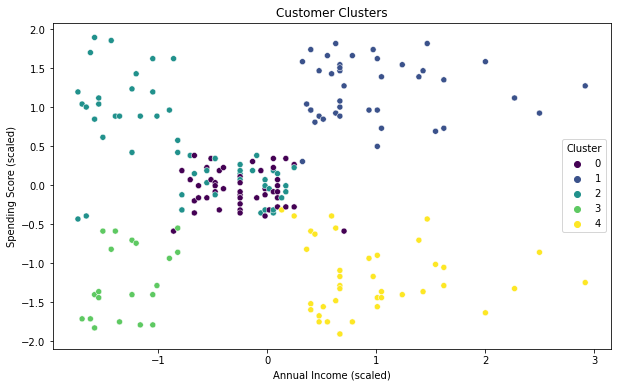

In [11]:
# Step 5: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 1], y=scaled_features[:, 2],
    hue=df['Cluster'], palette='viridis', legend='full'
)
plt.title('Customer Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()
